Introduction:

The film industry is a competitive place, with IMDB recording 12,077 films released in 2018 alone (IMDB, 2018). Therefore, when producing a new film, it is important to know what makes a successful film. As the internet is so vital to us these days, with most adults in the UK spending on average 3hrs and 15mins online each year (OFCOM, 2018) many studies have looked into the effect of utilising online platforms to boost a film’s success. Kim, Park & Park (2013) found online word of mouth to be highly influential in the consumption of movies. Further to this (Tsao, 2014) found online reviews by users to be more influential than those written by critics. 

The following report also aims to identify the features of previous successful movies, using an IMDB dataset. The measure of success I will be using in the following report is the ‘Gross’. Based on past research I believe that communication amongst consumers regarding a film is the best way to increase a movies success, especially if this mode of communication is online. 

Firstly, I will assess correlations between gross and the varaibles 'number of users for reviews' and 'movie facebook likes'. I expect that as each of these variables increase in number, so will gross (positive correlation); I expect this to be more pronounced in a 'high gross' group when compared with a 'low gross' group'. I also hypothesise that 1) Movies with a high gross will have a significantly higher mean number of user reviews than low gross movies and 2) Movies with a high gross will have a significantly higher mean number of Facebook likes than low gross movies. I will look at these hypotheses both in the context of the whole dataset and in relation to films which had the same budget as the current film (£1.5 Million), to see if the trends hold true at this budget. 


In [1]:
#usual imports for data anlysis 
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
import pandas as pd
import os

The Dataset contained information about 5,043 movies. I found 1 data point to be a clear outlier in 'movie Facebook likes'(Figure 2). This was removed from analysis(Figure 3). In relation to my variables of interest (Gross, Number of user reviews and Movie Facebook likes) 0 values are both possible and meaningful in the context of this analysis, so they were not removed.

Due to the high level of datapoints outside the 'gross' boxplot(Figure 1), I decided these should not be removed as it is highly likely they are meaningful data points. To cater for the wide distribution of data and the aim of this report, I split the dataset into high and low gross groups. I have defined ‘high gross’ as £3 Million as this would be a good return on the £1.5 Million spend. Low gross is defined as less than £3 Million. 

In my exploration data, for the high gross group, I can see a moderate relationship between gross and number of user reviews (r = .55)(Figure 5), However no such relationship existed amongst the low gross group(Figure 6). The high gross group showed a small relationship between Facebook likes and gross (r= .37)(Figure 7), however, this relationship was virtually non-existent in the in the low gross group(Figure 8). For the budget of £1.5 Million, there were no data points for analysis. Looking at the means for high an low gross in the exploration data, they seem to differ hugely for both number of user reviews and movie Facebook likes, these will be tested for significance in the test data. 


In [121]:
#reading my file into panda dataframe
df = pd.read_csv("/Users/emmacrawford/Downloads/movie_metadata.csv")
#check it's imported correctly              
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [119]:
df.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,4993.000000,5028.000000,4939.000000,5020.000000,5036.000000,4.159000e+03,5.043000e+03,5043.000000,5030.000000,5022.000000,4.551000e+03,4935.000000,5030.000000,5043.000000,4714.000000,5043.000000
mean,140.194272,107.201074,686.509212,645.009761,6560.047061,4.846841e+07,8.366816e+04,9699.063851,1.371173,272.770808,3.975262e+07,2002.470517,1651.754473,6.442138,2.220403,7525.964505
std,121.601675,25.197441,2813.328607,1665.041728,15020.759120,6.845299e+07,1.384853e+05,18163.799124,2.013576,377.982886,2.061149e+08,12.474599,4042.438863,1.125116,1.385113,19320.445110
min,1.000000,7.000000,0.000000,0.000000,0.000000,1.620000e+02,5.000000e+00,0.000000,0.000000,1.000000,2.180000e+02,1916.000000,0.000000,1.600000,1.180000,0.000000
25%,50.000000,93.000000,7.000000,133.000000,614.000000,5.340988e+06,8.593500e+03,1411.000000,0.000000,65.000000,6.000000e+06,1999.000000,281.000000,5.800000,1.850000,0.000000
50%,110.000000,103.000000,49.000000,371.500000,988.000000,2.551750e+07,3.435900e+04,3090.000000,1.000000,156.000000,2.000000e+07,2005.000000,595.000000,6.600000,2.350000,166.000000
75%,195.000000,118.000000,194.500000,636.000000,11000.000000,6.230944e+07,9.630900e+04,13756.500000,2.000000,326.000000,4.500000e+07,2011.000000,918.000000,7.200000,2.350000,3000.000000
max,813.000000,511.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,9.500000,16.000000,349000.000000


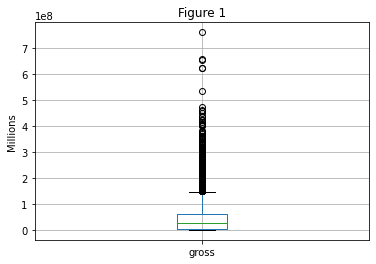

In [147]:
df.boxplot('gross')
plt.ylabel("Millions")
plt.title("Figure 1")
plt.show()

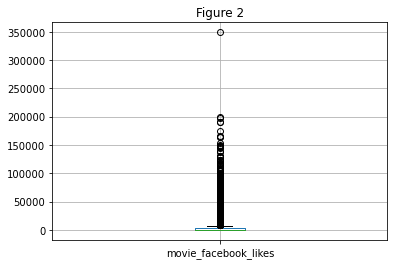

In [148]:
df.boxplot('movie_facebook_likes')
plt.title("Figure 2")
plt.show()

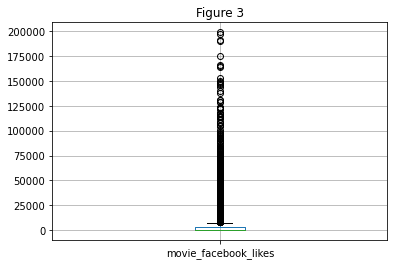

In [149]:
#removing outlier
df_clean = df[df['movie_facebook_likes'] <300000]

df_clean.boxplot('movie_facebook_likes')
plt.title("Figure 3")
plt.show()

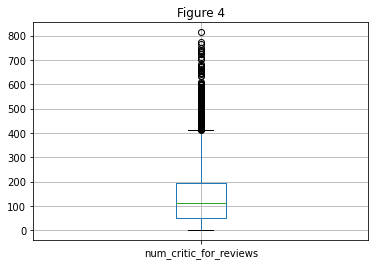

In [150]:
df.boxplot('num_critic_for_reviews')
plt.title("Figure 4")
plt.show()

In [52]:
#split into high and low gross groups
group1 = df_clean['gross'] >=3000000
high_gross = df_clean[group1]

group2 = df_clean['gross'] <=3000000
low_gross = df_clean[group2]

In [178]:
#split my data into two halves for exploration and testsing for both high and low gross
split = np.array_split(low_gross,2)
devlist_low_gross = split[0]
testlist_low_gross = split[1]

split2 = np.array_split(high_gross,2)
devlist_high_gross = split2[0]
testlist_high_gross = split2[1]

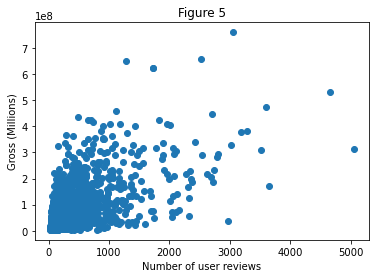

In [179]:
#Scatter plot to see correlation
plt.scatter(devlist_high_gross['num_user_for_reviews'], devlist_high_gross['gross'])
plt.xlabel("Number of user reviews")
plt.ylabel("Gross (Millions)")
plt.title("Figure 5")
plt.show()

In [181]:
#correlation coefficient 
devlist_high_gross['num_user_for_reviews'].corr(devlist_high_gross['gross'])

0.5583525081697462

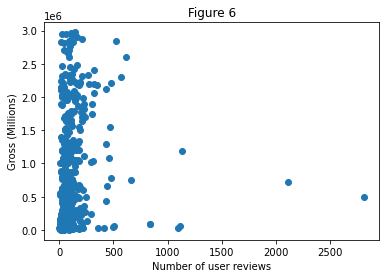

In [182]:
plt.scatter(devlist_low_gross['num_user_for_reviews'], devlist_low_gross['gross'])
plt.xlabel("Number of user reviews")
plt.ylabel("Gross (Millions)")
plt.title("Figure 6")
plt.show()

In [183]:
devlist_low_gross['num_user_for_reviews'].corr(devlist_low_gross['gross'])

0.06978893110703435

In [184]:
#partitioning off into only the budget of interest
df_our_budget = devlist_high_gross[devlist_high_gross['budget'] <=1500000]

In [185]:
#no data within our budget for dev data
df_our_budget.count()

color                        0
director_name                0
num_critic_for_reviews       0
duration                     0
director_facebook_likes      0
actor_3_facebook_likes       0
actor_2_name                 0
actor_1_facebook_likes       0
gross                        0
genres                       0
actor_1_name                 0
movie_title                  0
num_voted_users              0
cast_total_facebook_likes    0
actor_3_name                 0
facenumber_in_poster         0
plot_keywords                0
movie_imdb_link              0
num_user_for_reviews         0
language                     0
country                      0
content_rating               0
budget                       0
title_year                   0
actor_2_facebook_likes       0
imdb_score                   0
aspect_ratio                 0
movie_facebook_likes         0
dtype: int64

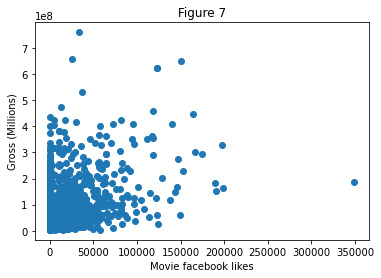

In [186]:
plt.scatter(devlist_high_gross['movie_facebook_likes'], devlist_high_gross['gross'])
plt.xlabel("Movie facebook likes")
plt.ylabel("Gross (Millions)")
plt.title("Figure 7")
plt.show()

In [187]:
devlist_high_gross['movie_facebook_likes'].corr(devlist_high_gross['gross'])

0.3742879969702411

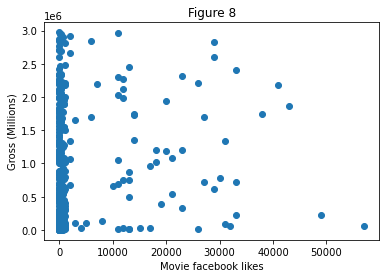

In [188]:
plt.scatter(devlist_low_gross['movie_facebook_likes'], devlist_low_gross['gross'])
plt.xlabel("Movie facebook likes")
plt.ylabel("Gross (Millions)")
plt.title("Figure 8")
plt.show()

In [189]:
devlist_low_gross['movie_facebook_likes'].corr(devlist_low_gross['gross'])

0.1067527622073111

In [190]:
#means for high gross
Mean_high_gross_user_rev = devlist_high_gross['num_user_for_reviews'].mean()
Mean_high_gross_fb_likes = devlist_high_gross['movie_facebook_likes'].mean()

print(Mean_high_gross_user_rev)
print(Mean_high_gross_fb_likes)

443.0186074429772
13241.213085234094


In [191]:
#and for low gross
Mean_low_gross_user_rev = devlist_low_gross['num_user_for_reviews'].mean()
Mean_low_gross_fb_likes = devlist_low_gross['movie_facebook_likes'].mean()

print(Mean_low_gross_user_rev)
print(Mean_low_gross_fb_likes)

125.78846153846153
3113.314903846154


In [264]:
#test data

The same analysis was performed on test data. As before, the relationship between number of user reviews and gross was stronger in the high gross group than the low gross group (r= .037 and r= 0.25, retrospectively)(Figure 9, Figure 10). This was also true for movie Facebook likes (r= .22, r= .04)(Figure 12, Figure 13). Unlike the exploration data, the test data contained many data points within our budget. When these were analysed, the high gross group showed a much stronger relationship between number of user reviews and gross (r= .67)(Figure 11). However, for movie Facebook likes the relationship became non-existent (r= .01)(Figure 14). 

A t-test was performed. This means that any violation of the assumption of normality would be adjusted for. A significant difference (p= 0.00) was found between the mean number of user reviews in the high and low groups, with a higher mean number of user reviews in the high gross group. There was also a significant difference (p= 0.00) between the mean number of Facebook likes in the high and low groups, whereby the mean was higher in the high gross group.

When looking solely at the data from films within our budget (£1.5 Million), there was still a significant difference (p= 0.00) in mean number of user reviews between high and low gross groups, in the same direction as before. Despite neither the high or low gross group showing a relationship between Facebook likes and gross. There was still a significant difference (p= 0.00) between the means for the two groups, with mean Facebook likes being higher in the high gross group than low gross group. 


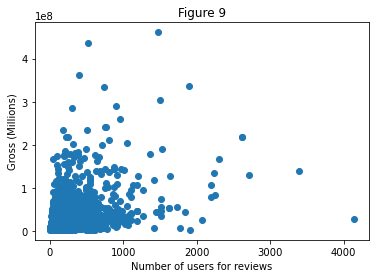

In [172]:
plt.scatter(testlist_high_gross['num_user_for_reviews'], testlist_high_gross['gross'])
plt.xlabel("Number of users for reviews")
plt.ylabel("Gross (Millions)")
plt.title("Figure 9")
plt.show()

In [63]:
testlist_high_gross['num_user_for_reviews'].corr(testlist_high_gross['gross'])

0.3657584163523119

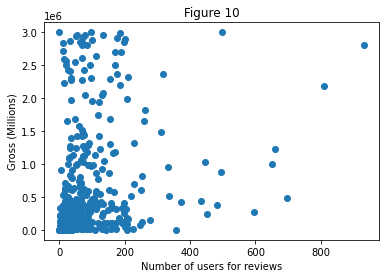

In [158]:
plt.scatter(testlist_low_gross['num_user_for_reviews'], testlist_low_gross['gross'])
plt.xlabel("Number of users for reviews")
plt.ylabel("Gross (Millions)")
plt.title("Figure 10")
plt.show()

In [71]:
testlist_low_gross['num_user_for_reviews'].corr(testlist_low_gross['gross'])

0.246099201251166

In [73]:
#retriving data for our budget - high gross
df_our_budget2 =testlist_high_gross[testlist_high_gross['budget'] <=1500000]

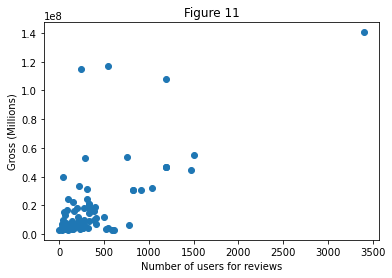

In [173]:
plt.scatter(df_our_budget2['num_user_for_reviews'], df_our_budget2['gross'])
plt.xlabel("Number of users for reviews")
plt.ylabel("Gross (Millions)")
plt.title("Figure 11")
plt.show()

In [75]:
df_our_budget2['num_user_for_reviews'].corr(df_our_budget2['gross'])

0.6708398451352189

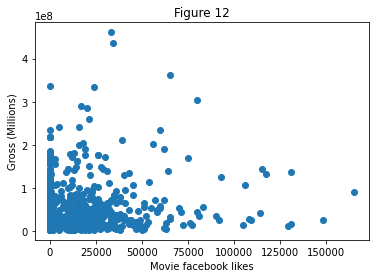

In [175]:
plt.scatter(testlist_high_gross['movie_facebook_likes'], testlist_high_gross['gross'])
plt.xlabel("Movie facebook likes")
plt.ylabel("Gross (Millions)")
plt.title("Figure 12")
plt.show()

In [81]:
testlist_high_gross['movie_facebook_likes'].corr(testlist_high_gross['gross'])

0.2184989085041956

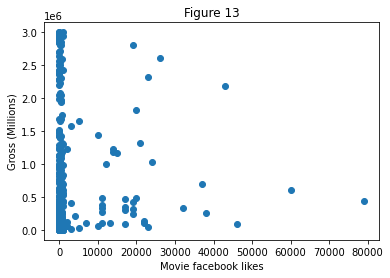

In [176]:
plt.scatter(testlist_low_gross['movie_facebook_likes'], testlist_low_gross['gross'])
plt.xlabel("Movie facebook likes")
plt.ylabel("Gross (Millions)")
plt.title("Figure 13")
plt.show()

In [83]:
testlist_low_gross['movie_facebook_likes'].corr(testlist_low_gross['gross'])

0.037171688677738846

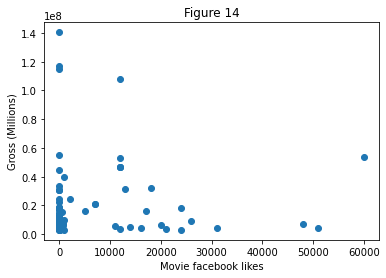

In [177]:
plt.scatter(df_our_budget2['movie_facebook_likes'], df_our_budget2['gross'])
plt.xlabel("Movie facebook likes")
plt.ylabel("Gross (Millions)")
plt.title("Figure 14")
plt.show()

In [86]:
df_our_budget2['movie_facebook_likes'].corr(df_our_budget2['gross'])

0.009805694285543879

In [87]:
#mean, SD and count for user reviews in high gross group
Mean_high_gross_user_rev2 = testlist_high_gross['num_user_for_reviews'].mean()
Std_high_gross_user_rev2 = testlist_high_gross['num_user_for_reviews'].std()   
count_high_gross_user_rev2 = testlist_high_gross['num_user_for_reviews'].count()

print(Mean_high_gross_user_rev2)
print(Std_high_gross_user_rev2)
print(count_high_gross_user_rev2)

285.15615615615616
329.677278277013
1665


In [88]:
#and in the low gross group
Mean_low_gross_user_rev2 = testlist_low_gross['num_user_for_reviews'].mean()
Std_low_gross_user_rev2 = testlist_low_gross['num_user_for_reviews'].std()   
count_low_gross_user_rev2 = testlist_low_gross['num_user_for_reviews'].count()

print(Mean_low_gross_user_rev2)
print(Std_low_gross_user_rev2)
print(count_low_gross_user_rev2)

87.34057971014492
114.67597237371402
414


In [104]:
#ttest comparing means of user reviews in high and low gross groups

combinederror3=(((Std_low_gross_user_rev2**2)/count_low_gross_user_rev2)+(Std_high_gross_user_rev2**2)/count_high_gross_user_rev2)**0.5
z= (Mean_high_gross_user_rev2 - Mean_low_gross_user_rev2)/combinederror3

p_value_from_normal_for_diff3 = (1-stats.norm.cdf(z))
print('p_value: ','%.3f' % p_value_from_normal_for_diff3)

p_value:  0.000


In [90]:
#mean, SD and count for facebook likes in high gross group
Mean_high_gross_fb_likes2 = testlist_high_gross['movie_facebook_likes'].mean()
Std_high_gross_fb_likes2 = testlist_high_gross['movie_facebook_likes'].std()   
count_high_gross_fb_likes2 = testlist_high_gross['movie_facebook_likes'].count()

print(Mean_high_gross_fb_likes2)
print(Std_high_gross_fb_likes2)
print(count_high_gross_fb_likes2)

7218.513513513513
16611.382278048703
1665


In [91]:
#and in the low gross group
Mean_low_gross_fb_likes2 = testlist_low_gross['movie_facebook_likes'].mean()
Std_low_gross_fb_likes2 = testlist_low_gross['movie_facebook_likes'].std()   
count_low_gross_fb_likes2 = testlist_low_gross['movie_facebook_likes'].count()

print(Mean_low_gross_fb_likes2)
print(Std_low_gross_fb_likes2)
print(count_low_gross_fb_likes2)

2259.7927710843373
7704.975340989832
415


In [107]:
#ttest comparing means of facebook likes in high and low gross groups

combinederror4=(((Std_high_gross_fb_likes2**2)/count_high_gross_fb_likes2)+(Std_low_gross_fb_likes2**2)/count_low_gross_fb_likes2)**0.5
z= (Mean_high_gross_fb_likes2 - Mean_low_gross_fb_likes2)/combinederror4

p_value_from_normal_for_diff4 = (1-stats.norm.cdf(z))
print('p_value: ','%.3f' %p_value_from_normal_for_diff4)

p_value:  0.000


In [133]:
#same analysis as before, but only using data within the £1.5 Million budget
Mean_high_my_budget_user_rev = df_our_budget2['num_user_for_reviews'].mean()
Std_high_my_budget_user_rev = df_our_budget2['num_user_for_reviews'].std()   
count_high_my_budget_user_rev = df_our_budget2['num_user_for_reviews'].count()

print(Mean_high_my_budget_user_rev)
print(Std_high_my_budget_user_rev)
print(count_high_my_budget_user_rev)

395.1923076923077
492.9523845632085
78


In [130]:
df_our_budget3 =testlist_low_gross[testlist_low_gross['budget'] <=1500000]

In [134]:
Mean_low_my_budget_user_rev2 = df_our_budget3['num_user_for_reviews'].mean()
Std_low_my_budget_user_rev2 = df_our_budget3['num_user_for_reviews'].std()   
count_low_my_budget_user_rev2 = df_our_budget3['num_user_for_reviews'].count()

print(Mean_low_my_budget_user_rev2)
print(Std_low_my_budget_user_rev2)
print(count_low_my_budget_user_rev2)

86.32367149758454
121.65320186628364
207


In [137]:
combinederror3=(((Std_low_my_budget_user_rev2**2)/count_low_my_budget_user_rev2)+(Std_high_my_budget_user_rev**2)/count_high_my_budget_user_rev)**0.5
z= (Mean_high_my_budget_user_rev - Mean_low_my_budget_user_rev2)/combinederror3

p_value_from_normal_for_diff3 = (1-stats.norm.cdf(z))
print('p_value: ','%.3f' % p_value_from_normal_for_diff3)

p_value:  0.000


In [135]:
Mean_high_my_budget_fb_likes = df_our_budget2['movie_facebook_likes'].mean()
Std_high_my_budget_fb_likes = df_our_budget2['movie_facebook_likes'].std()   
count_high_my_budget_fb_likes = df_our_budget2['movie_facebook_likes'].count()

print(Mean_high_my_budget_fb_likes)
print(Std_high_my_budget_fb_likes)
print(count_high_my_budget_fb_likes)

6360.384615384615
12131.004262697237
78


In [136]:
Mean_low_my_budget_fb_likes = df_our_budget3['movie_facebook_likes'].mean()
Std_low_my_budget_fb_likes = df_our_budget3['movie_facebook_likes'].std()   
count_low_my_budget_fb_likes = df_our_budget3['movie_facebook_likes'].count()

print(Mean_low_my_budget_fb_likes)
print(Std_low_my_budget_fb_likes)
print(count_low_my_budget_fb_likes)

1438.7342995169083
4993.4941909334175
207


In [138]:
combinederror3=(((Std_low_my_budget_fb_likes**2)/count_low_my_budget_fb_likes)+(Std_high_my_budget_fb_likes**2)/count_high_my_budget_fb_likes)**0.5
z= (Mean_high_my_budget_fb_likes - Mean_low_my_budget_fb_likes)/combinederror3

p_value_from_normal_for_diff3 = (1-stats.norm.cdf(z))
print('p_value: ','%.3f' % p_value_from_normal_for_diff3)

p_value:  0.000


Report summary:

This report aimed to look at the properties of high and low grossing movies. I looked at weather measures of online communication between moviegogers has a relationship with gross and weather these differed between high and low grossing movies. It also looked at weather these relationships held true at a low budget (£1.5 Million). My predictions about correlations were nor entirely supported by the data, however, both my hypotheses were supported by significant findings. Both mean movie Facebook likes, and number of user reviews were significantly higher in the high gross group than the low gross group. This was also true only using data within our budget.  

Based on my analysis, I would suggest the studio encourage any moviegoers to share their opinions on the movie on online film sites and social media, this conclusion is further supported by the aforementioned studies (Kim, Park & Park, 2013 & Tsao, 2014). This encouragement could be in the form of a short clip at the end of the movie, leaflets handed out at the movie theatre, or emails sent to those who booked online. 

However, some caution should be taken when using the results of this report to inform behaviour. There was a huge amount of data missing for the ‘Gross’ variable (884 missing data points), enough to potentially have a big impact on results. If we had access to these values, it is possible for the results to look quite different. 

If further analysis were to be completed, it would be useful to have a greater amount of data on low budget films, to better inform conclusions specifically about this, as it does seem from this data that low budget films can show different trends than 'any' budget films.


References:

IMDB, 2018, Feature Film, Released between 2018-01-01 and 2018-12-31 (Sorted by Popularity Ascending), https://www.imdb.com/search/title/?year=2018&title_type=feature&

Kim, S.H., Park, N. and Park, S.H., 2013. Exploring the effects of online word of mouth and expert reviews on theatrical movies' box office success. Journal of Media Economics, 26(2), pp.98-114.

OFCOM, 30 May 2019, Online nation report, https://www.ofcom.org.uk/__data/assets/pdf_file/0024/149253/online-nation-summary.pdf

Tsao, W.C., 2014. Which type of online review is more persuasive? The influence of consumer reviews and critic ratings on moviegoers. Electronic Commerce Research, 14(4), pp.559-583
